In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nilearn nibabel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 58.3 MB/s eta 0:00:00


In [3]:
import nibabel as nib
from nilearn import datasets, plotting
import numpy as np
import os

# Fetch the Harvard-Oxford cortical atlas
cortical_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')

# Fetch the Harvard-Oxford sub-cortical atlas
subcortical_atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-1mm')

# Load the cortical and sub-cortical atlas images
cortical_img = nib.load(cortical_atlas.filename)
subcortical_img = nib.load(subcortical_atlas.filename)

# Load the atlas labels
cortical_labels = cortical_atlas.labels
subcortical_labels = subcortical_atlas.labels

# Print cortical atlas labels with their indices
print("Cortical Atlas Labels:")
for i, label in enumerate(cortical_labels):
    print(f"{i}: {label}")

# Print sub-cortical atlas labels with their indices
print("\nSub-Cortical Atlas Labels:")
for i, label in enumerate(subcortical_labels):
    print(f"{i}: {label}")



Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/fsl



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/fsl/7311eb6e2a75d5a4596a018fd2af9a77/HarvardOxford.tgz..... done.


Cortical Atlas Labels:
0: Background
1: Frontal Pole
2: Insular Cortex
3: Superior Frontal Gyrus
4: Middle Frontal Gyrus
5: Inferior Frontal Gyrus, pars triangularis
6: Inferior Frontal Gyrus, pars opercularis
7: Precentral Gyrus
8: Temporal Pole
9: Superior Temporal Gyrus, anterior division
10: Superior Temporal Gyrus, posterior division
11: Middle Temporal Gyrus, anterior division
12: Middle Temporal Gyrus, posterior division
13: Middle Temporal Gyrus, temporooccipital part
14: Inferior Temporal Gyrus, anterior division
15: Inferior Temporal Gyrus, posterior division
16: Inferior Temporal Gyrus, temporooccipital part
17: Postcentral Gyrus
18: Superior Parietal Lobule
19: Supramarginal Gyrus, anterior division
20: Supramarginal Gyrus, posterior division
21: Angular Gyrus
22: Lateral Occipital Cortex, superior division
23: Lateral Occipital Cortex, inferior division
24: Intracalcarine Cortex
25: Frontal Medial Cortex
26: Juxtapositional Lobule Cortex (formerly Supplementary Motor Corte

<ipython-input-4-bf469e6c49d9>:34: FutureWarning: Image data has type int64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  mask_img = nib.Nifti1Image(mask_data, cortical_img.affine)


Mask saved to /content/mask_combined.nii.gz
File saved successfully.


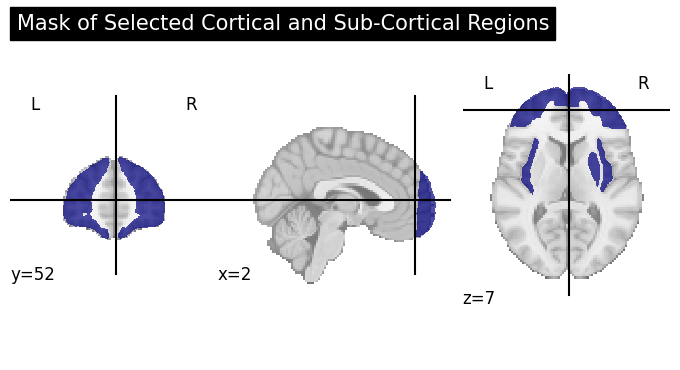

In [4]:
# Specify the indices of the regions you want to include in the mask
# Example: indices for regions in both atlases
cortical_region_indices = [1, 2]  # Replace with actual cortical region indices
subcortical_region_indices = [17, 18, 19, 20]  # Replace with actual sub-cortical region indices

# Validate the indices
max_cortical_index = cortical_img.get_fdata().max()
max_subcortical_index = subcortical_img.get_fdata().max()
if any(idx > max_cortical_index for idx in cortical_region_indices):
    raise ValueError("One or more cortical region indices are out of range")
if any(idx > max_subcortical_index for idx in subcortical_region_indices):
    raise ValueError("One or more sub-cortical region indices are out of range")

# Load the atlas data
cortical_data = cortical_img.get_fdata()
subcortical_data = subcortical_img.get_fdata()

# Ensure both atlases have the same shape and affine transformation
if cortical_data.shape != subcortical_data.shape or not np.allclose(cortical_img.affine, subcortical_img.affine):
    raise ValueError("Cortical and sub-cortical atlas images must have the same shape and affine transformation")

# Create an empty mask
mask_data = np.zeros(cortical_data.shape, dtype=int)

# Fill the mask with the regions from the cortical atlas
for index in cortical_region_indices:
    mask_data[cortical_data == index] = 1

# Fill the mask with the regions from the sub-cortical atlas
for index in subcortical_region_indices:
    mask_data[subcortical_data == index] = 1

# Create a new Nifti image for the mask
mask_img = nib.Nifti1Image(mask_data, cortical_img.affine)

# Define the save path in Colab
mask_file_path = '/content/mask_combined.nii.gz'

# # Save path in Google Drive
# mask_file_path = '/content/drive/My Drive/mask_combined.nii.gz'

# Save the mask to a NIfTI file
nib.save(mask_img, mask_file_path)
print(f"Mask saved to {mask_file_path}")

# Verify if the file was saved successfully
if os.path.isfile(mask_file_path):
    print("File saved successfully.")
else:
    print("File not found. There was an error saving the file.")

# Plot the mask
plotting.plot_roi(mask_img, title="Mask of Selected Cortical and Sub-Cortical Regions")
plotting.show()
